In [86]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("albatross_foil-camber_line.csv")

# Display the first 5 rows
display(df.head())

# Convert DataFrame to dictionary
foil_dict = dict(zip(df["X(mm)"], df["Y(mm)"]))
display(foil_dict)

x_foil = df["X(mm)"].tolist()
y_foil = df["Y(mm)"].tolist()

,X(mm),Y(mm)
0,0.000,0.000000
1,1.241,0.978000
2,2.486,1.335821
3,4.978,2.261891
4,7.473,3.007482


{0.0: 0.0,
 1.241: 0.978,
 2.486: 1.335821,
 4.978: 2.261891,
 7.473: 3.007482,
 9.968: 3.629307,
 14.962: 4.642119,
 19.958: 5.270297,
 29.956: 5.816957,
 39.956: 5.908512,
 49.96: 5.539977,
 59.965: 4.806317,
 69.972: 3.832384,
 79.98: 2.728385,
 89.989: 1.524238,
 94.994: 0.842138,
 100.0: 0.0}

$y(x) = \begin{cases} 0.0757438198145068 x^{3} - 0.48369211108273 x^{2} + 1.27168442585302 x & \text{for}\: x \geq 0 \wedge x \leq 2.486 \\- 0.0164005768176812 x^{3} + 0.203520799000128 x^{2} - 0.436726868612968 x + 1.41570349268081 & \text{for}\: x \geq 2.486 \wedge x \leq 4.978 \\0.0051175805847793 x^{3} - 0.117831363648218 x^{2} + 1.16296419705049 x - 1.23871721561009 & \text{for}\: x \geq 4.978 \wedge x \leq 7.473 \\- 0.000365930224799395 x^{3} + 0.00510346519172705 x^{2} + 0.244272221129586 x + 1.0497444964089 & \text{for}\: x \geq 7.473 \wedge x \leq 9.968 \\- 0.000199278194540061 x^{3} + 0.000119902878852579 x^{2} + 0.293948370264324 x + 0.884687211550524 & \text{for}\: x \geq 9.968 \wedge x \leq 14.962 \\0.000245238196808445 x^{3} - 0.0198326598632167 x^{2} + 0.592478614011156 x - 0.604182624096177 & \text{for}\: x \geq 14.962 \wedge x \leq 19.958 \\0.00012274930637512 x^{3} - 0.0124987600374118 x^{2} + 0.446108641287747 x + 0.369568014441756 & \text{for}\: x \geq 19.958 \wedge x \leq 29.956 \\- 3.90384183972492 \cdot 10^{-5} x^{3} + 0.00204077921243152 x^{2} + 0.0105622035194419 x + 4.71864437770423 & \text{for}\: x \geq 29.956 \wedge x \leq 39.956 \\2.88369943703519 \cdot 10^{-5} x^{3} - 0.00609531076519523 x^{2} + 0.335647814665496 x + 0.388937484720252 & \text{for}\: x \geq 39.956 \wedge x \leq 49.96 \\1.873961567553 \cdot 10^{-5} x^{3} - 0.0045819156464153 x^{2} + 0.260038594531253 x + 1.64808303068919 & \text{for}\: x \geq 49.96 \wedge x \leq 59.965 \\2.10662735920923 \cdot 10^{-5} x^{3} - 0.00500046977231526 x^{2} + 0.28513719269084 x + 1.14640388447584 & \text{for}\: x \geq 59.965 \wedge x \leq 69.972 \\6.97096097190038 \cdot 10^{-6} x^{3} - 0.00204163812833513 x^{2} + 0.0781018248982628 x + 5.97529680286998 & \text{for}\: x \geq 69.972 \wedge x \leq 79.98 \\- 1.90634019269676 \cdot 10^{-5} x^{3} + 0.00420504690561922 x^{2} - 0.421508044117408 x + 19.2948959108278 & \text{for}\: x \geq 79.98 \wedge x \leq 89.989 \\- 0.000149790157233174 x^{3} + 0.0394969568553698 x^{2} - 3.59739172858552 x + 114.559761538028 & \text{for}\: x \geq 89.989 \wedge x \leq 100.0 \end{cases}$

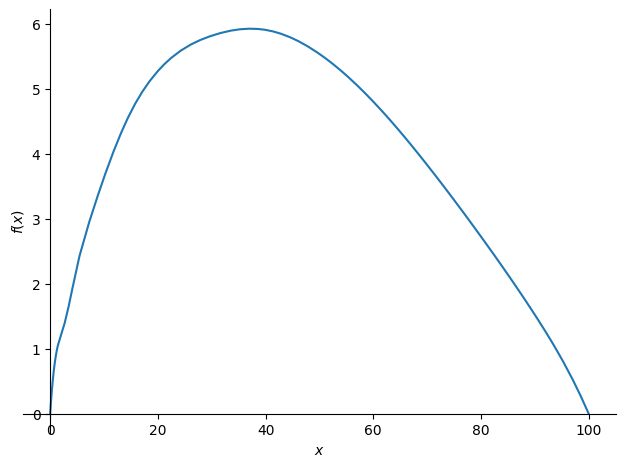

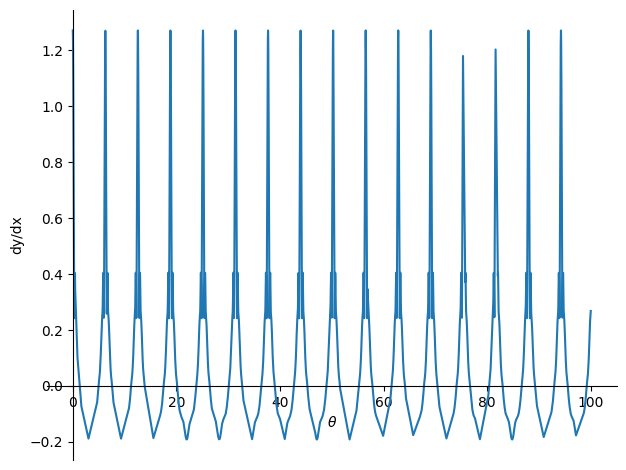

KeyboardInterrupt: 

In [103]:
import sympy as sp
from IPython.display import Markdown

alpha, theta, x = sp.symbols("alpha, theta, x")
chord_length = 100

# Construct an interpolating polynomial for x_foil and y_foil
y_func_x = sp.interpolating_spline(3, x, x_foil, y_foil)
display(Markdown("$y(x) = " + sp.latex(y_func_x) + "$"))
sp.plot(y_func_x, (x, 0, chord_length), ylabel="y(x)")

# Differentiate y_func_x with respect to x
dydx_func_x = y_func_x.diff(x)

# Variable substitution from x to theta
dydx_func_theta = dydx_func_x.subs(x, chord_length / 2 * (1 - sp.cos(theta)))
display(Markdown("$\\frac{dy}{dx}(\\theta) = " + sp.latex(dydx_func_theta) + "$"))
sp.plot(dydx_func_theta, (theta, 0, chord_length), ylabel="dy/dx")

# Calculate the lift coefficient
C_l = (
    2
    * sp.pi
    * (
        alpha
        + (1 / sp.pi)
        * sp.integrate(dydx_func_theta * (sp.cos(theta) - 1), (theta, 0, sp.pi))
    )
)

# Display the equation
display(Markdown("$C_l = " + sp.latex(C_l) + "$"))